In [178]:
# for문으로 distace matrix 구하기---------------------------------------------
import numpy as np
import time

# Sample data matrix 생성
rows, cols = 1000, 10000
data = np.round(np.random.rand(rows, cols), 2)


def compute_distance(data):
    n = data.shape[0]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i, j] = np.linalg.norm(data[i] - data[j])
    return dist_matrix

dist_matrix = compute_distance(data)
print(f"Distance matrix (shape: {dist_matrix.shape})")
print(dist_matrix) 




Distance matrix (shape: (1000, 1000))
[[ 0.         40.97764757 40.64722131 ... 40.85313329 40.80010294
  40.59022173]
 [40.97764757  0.         41.0954815  ... 41.21568512 41.18515024
  40.81723288]
 [40.64722131 41.0954815   0.         ... 40.80739516 40.28134059
  40.92471503]
 ...
 [40.85313329 41.21568512 40.80739516 ...  0.         41.06957146
  40.77316519]
 [40.80010294 41.18515024 40.28134059 ... 41.06957146  0.
  40.78606502]
 [40.59022173 40.81723288 40.92471503 ... 40.77316519 40.78606502
   0.        ]]


In [307]:
# 벡터화로 distace matrix 구하기---------------------------------------------
from scipy.spatial.distance import pdist, squareform
import numpy as np


rows, cols = 1000, 10000
data = np.random.rand(rows, cols)


dist_vector = pdist(data, metric='euclidean')

dist_matrix = squareform(dist_vector)


print("shape:", dist_matrix.shape)
print(dist_matrix)


shape: (1000, 1000)
[[ 0.         40.86913501 40.85095394 ... 41.11258061 40.59578691
  40.71984556]
 [40.86913501  0.         40.65406885 ... 40.68603138 41.10191377
  40.75379564]
 [40.85095394 40.65406885  0.         ... 40.72611946 40.18502658
  40.5212276 ]
 ...
 [41.11258061 40.68603138 40.72611946 ...  0.         40.39612886
  40.64491693]
 [40.59578691 41.10191377 40.18502658 ... 40.39612886  0.
  40.79373308]
 [40.71984556 40.75379564 40.5212276  ... 40.64491693 40.79373308
   0.        ]]


In [12]:
# --메모리 에러난 모습-------------------------------------------
import numpy as np

# 행과 열의 개수 설정
n_samples = 1000  # 샘플 수 (행)
n_features = 10000 # 특성 수 (열)

# 랜덤 값으로 샘플 행렬 생성 (정규 분포로 무작위 값 생성)
samples = np.random.rand(n_samples, n_features)

# 거리 행렬 구하기 (벡터화된 방식으로 유클리드 거리 계산)
# 각 행 벡터 간의 차이 제곱의 합의 제곱근을 구하여 거리 계산
dist_matrix = np.sqrt(((samples[:, np.newaxis, :] - samples[np.newaxis, :, :]) ** 2).sum(axis=2))

print("Samples Matrix:\n", samples)
print("\n",dist_matrix.shape)
print("Distance Matrix:\n", dist_matrix)


MemoryError: Unable to allocate 74.5 GiB for an array with shape (1000, 1000, 10000) and data type float64

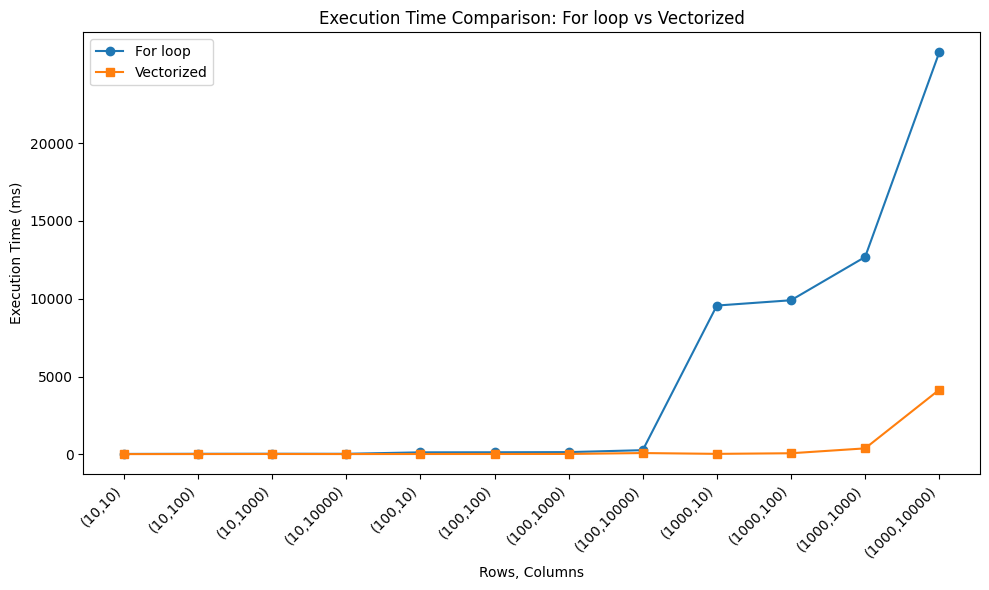

In [7]:
import numpy as np
import matplotlib.pyplot as plt


rows = [10, 10, 10, 10, 100, 100, 100, 100, 1000, 1000, 1000, 1000]
columns = [10, 100, 1000, 10000, 10, 100, 1000, 10000, 10, 100, 1000, 10000]


for_times = [29.2, 38.2, 40.2, 37.6, 130.8, 134.8, 145.4, 269.8, 9.56*1000, 9.9*1000, 12.68*1000, 25.82*1000]
vectorized_times = [18.2, 20.8, 24.8, 20.2, 23.6, 25.0, 27.2, 85.4, 33.0, 72.4, 386.0, 4.15*1000]


plt.figure(figsize=(10, 6))
plt.plot([f"({r},{c})" for r, c in zip(rows, columns)], for_times, label='For loop', marker='o')
plt.plot([f"({r},{c})" for r, c in zip(rows, columns)], vectorized_times, label='Vectorized', marker='s')
plt.yticks(np.arange(0, 25000, 5000))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rows, Columns')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time Comparison: For loop vs Vectorized')
plt.legend()
plt.tight_layout()
plt.show()


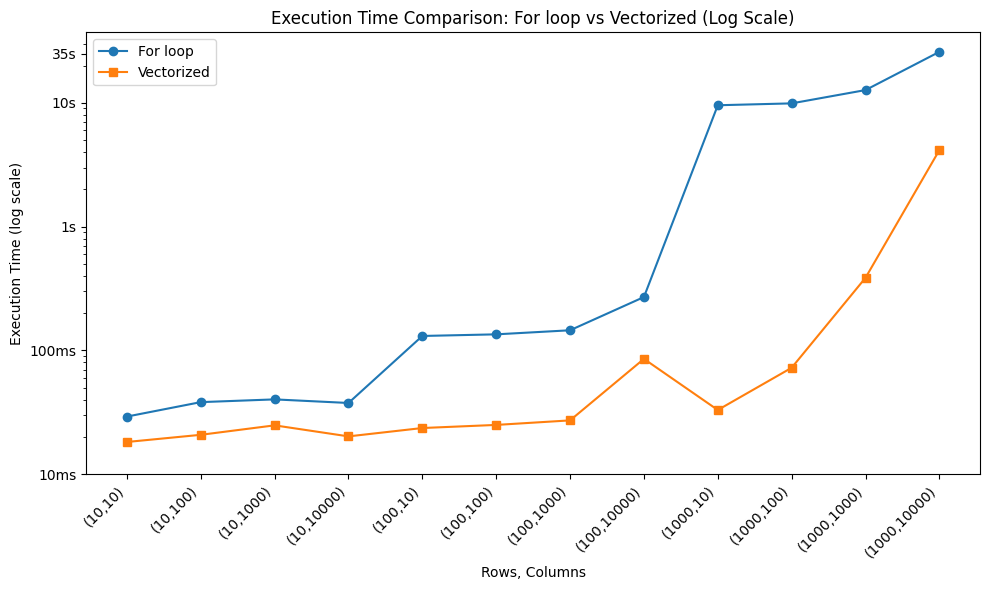

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 정리
rows = [10, 10, 10, 10, 100, 100, 100, 100, 1000, 1000, 1000, 1000]
columns = [10, 100, 1000, 10000, 10, 100, 1000, 10000, 10, 100, 1000, 10000]

# For문 실행 시간 (ms 단위)
for_times = [29.2, 38.2, 40.2, 37.6, 130.8, 134.8, 145.4, 269.8, 9.56*1000, 9.9*1000, 12.68*1000, 25.82*1000]

# 벡터화 실행 시간 (ms 단위)
vectorized_times = [18.2, 20.8, 24.8, 20.2, 23.6, 25.0, 27.2, 85.4, 33.0, 72.4, 386.0, 4.15*1000]
# y축을 로그 스케일로 변환하여 작은 값도 차이가 보이도록 수정

plt.figure(figsize=(10, 6))

# 데이터 그리기
plt.plot([f"({r},{c})" for r, c in zip(rows, columns)], for_times, label='For loop', marker='o')
plt.plot([f"({r},{c})" for r, c in zip(rows, columns)], vectorized_times, label='Vectorized', marker='s')

# x축 라벨 회전 및 설정
plt.xticks(rotation=45, ha='right')

# y축 간격 설정 (로그 스케일 적용)
plt.yscale('log')
plt.yticks([10, 100, 1000, 10000, 25000], labels=['10ms', '100ms', '1s', '10s', '35s'])

# 라벨 및 타이틀
plt.xlabel('Rows, Columns')
plt.ylabel('Execution Time (log scale)')
plt.title('Execution Time Comparison: For loop vs Vectorized (Log Scale)')

# 범례 추가 및 레이아웃 조정
plt.legend()
plt.tight_layout()

# Plot을 보여줌
plt.show()


In [29]:
import numpy as np
from statistics import quantiles
qdata =[55,57,58,59,60,63,64,65,69,70,72,73,75,78,80,82,88,90,110,130]
print(np.quantile(qdata,(0.25,0.50,0.75)))
print(quantiles(qdata,n=4))

[62.25 71.   80.5 ]
[60.75, 71.0, 81.5]


In [34]:
qd =[2,6,10]
print(np.quantile(qd,(0.25,0.50,0.75)))
print(quantiles(qd,n=4))

[4. 6. 8.]
[2.0, 6.0, 10.0]
